In [1]:
import gym
import numpy as np
import random
from tqdm import tqdm

In [2]:
# Training parameters
n_training_episodes = 2400  # Total training episodes
learning_rate = 0.7          # Learning rate

# Evaluation parameters
n_eval_episodes = 100        # Total number of test episodes

# Environment parameters
max_steps = 99              # Max steps per episode
gamma = 0.99                # Discounting rate
eval_seed = []               # The evaluation seed of the environment

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1            # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.0025            # Exponential decay rate for exploration prob

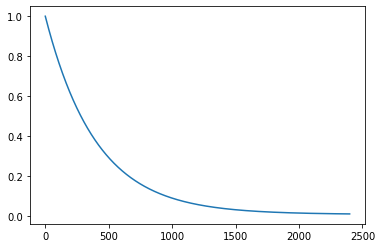

In [3]:
import matplotlib.pyplot as plt
plt.plot([min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) for episode in range(n_training_episodes)])

In [4]:
#Define policies
#Define epsilon-greedy for exploring policy
def epsilon_greedy(Q_table,state,epsilon):
    """Epsilon greedy policy."""
    
    if random.random() < epsilon : 
        #With probability epsilon, select random action
        action = random.randint(0,Q_table.shape[1]-1)
    else:
        #Else, select action with argmax
        action = np.argmax(Q_table[state])
    
    return action
    
#Define greedy policy for updating
def greedy(Q_table,state):
    """Greedy policy"""
    return np.argmax(Q_table[state])

In [5]:
env = gym.make("Taxi-v3")
#env = gym.make("FrozenLake-v1",map_name="4x4",is_slippery=False)
#Define Q table 
Q_table = np.zeros ((env.observation_space.n,env.action_space.n))


def train(env = env, num_episodes = n_training_episodes, min_epsilon = min_epsilon, max_epsilon = max_epsilon,
          decay_rate = decay_rate,max_steps = max_steps, Q_table = Q_table, lr = learning_rate,gamma = gamma):
    
    ## Loop for episodes
    for episode in tqdm(range(num_episodes)):
        ## Epsilon callback 
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
        ## Initialize episode 
        state = env.reset()
        step = 0 
        done = False
        
        ## Define the number of steps per episode      
        for step in range(int(max_steps)):
            ## Choose action 
            action = epsilon_greedy(Q_table,state,epsilon)
            ## Step 
            new_state, reward, done, info = env.step(action)
            ## Update the Q_table
            Q_table[state,action] += lr*(reward+gamma*max(Q_table[new_state]) - Q_table[state,action])
            ## Si acabamos, cortamos
            if done: 
                break
            ## Actualizar 
            state = new_state
    return Q_table

In [6]:
Q_table = train()


100%|█████████████████████████████████████| 2400/2400 [00:00<00:00, 2762.10it/s]


In [7]:
def evaluate(env = env,Q_table = Q_table,episodes_eval = n_eval_episodes,max_steps = max_steps):
    global_rewards = []
    ##Loop for episodes
    for episode in tqdm(range(episodes_eval)):
        ## Initialize episode 
        state = env.reset()
        step = 0 
        done = False
        episode_rewards = 0
        ## Define the number of steps per episode      
        for step in range(int(max_steps)):
            ## Choose action 
            action = greedy(Q_table,state)
            ## Step 
            new_state, reward, done, info = env.step(action)
            ## Accumulate rewards
            episode_rewards += reward 
            if done: 
                break
            ## Actualizar 
            state = new_state
        ## Save variables
        global_rewards.append(episode_rewards)
            
    
    return global_rewards 
        
        
    

In [8]:
global_rewards = evaluate()

print(f"Mean rewards: {np.mean(global_rewards)}, std rewards: {np.std(global_rewards)}")

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 4442.18it/s]

Mean rewards: 7.95, std rewards: 2.662235902394827
